# Proyecto 2 

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-26

**Fecha de actualización:** 2022-02-27

# Morosidad de clientes.
En este proyecto se aplicarán técnicas de aprendizaje automático, tanto supervisado como no supervisado, para predecir y analizar la morosidad de clientes.

El conjunto de datos está basada en los datos reales de una empresa proveedora de servicio de Internet.
Los datos han sido previamente anonimizados y escalados, con el fin de preservar la identidad de clientes, así como proteger la información sensible.

Diccionario del conjunto de datos.
<table>
    <tr>
        <td>
            <b>invoice_id</b>
        </td>
        <td>
            Identificador del número de factura.(Múltiples ítems pueden pertenecer a la misma factura).
        </td>
    </tr>
    <tr>
        <td>
            <b>service_contract_id</b>
        </td>
        <td>
            Identificador del número de contrato.
        </td>
    </tr>
    <tr>
        <td>
            <b>neighborhood</b>
        </td>
        <td>
            Sector en el que se ha instalado el servicio.
        </td>
    </tr>
    <tr>
        <td>
            <b>contract_days</b>
        </td>
        <td>
            Días transcurridos desde la fecha de contratación hasta la fecha de pago.
        </td>
    </tr>
    <tr>
        <td>
            <b>days_past_due</b>
        </td>
        <td>
            Días de retraso o anticipo en el pago <em>( 0< days_past_due >= 0 )</em>. Si <em>days_past_due</em> es negativo, significa que el pago se anticipó <em>|days_past_due|</em> días, caso contrario si es positivo, el pago se retrasó en <em>days_past_due</em>.
        </td>
    </tr>
    <tr>
        <td>
            <b>access_type</b>
        </td>
        <td>
            Tipo de acceso.
        </td>
    </tr>
    <tr>
        <td>
            <b>contract_plan</b>
        </td>
        <td>
            Tipo de contrato, corresponde al plan contratado por el cliente.
        </td>
    </tr>
    <tr>
        <td>
            <b>lat</b>
        </td>
        <td>
            Latitud de la instalación
        </td>
    </tr>
    <tr>
        <td>
            <b>lng</b>
        </td>
        <td>
            Longitud de la instalación
        </td>
    </tr>
    <tr>
        <td>
            <b>emision_date</b>
        </td>
        <td>
            Fecha de emisión de la factura
        </td>
    </tr>
    <tr>
        <td>
            <b>total_factura</b>
        </td>
        <td>
            Valor total de la factura a la cual pertenece el <em>item</em>. Pueden existir varios registros con el mismo numero de factura.
        </td>
    </tr>
    <tr>
        <td>
            <b>item_price</b>
        </td>
        <td>
            Valor del item facturado
        </td>
    </tr>
    <tr>
        <td>
            <b>incident_type</b>
        </td>
        <td>
            Tipo de incidente, NULL si el cliente no ha reportado un incidente  dentro del periodo (mes).
        </td>
    </tr>
    <tr>
        <td>
            <b>incident_count</b>
        </td>
        <td>
            Cantidad de veces que el cliente ha reportado un incidente dentro del periodo (mes).
        </td>
    </tr>
</table>

<b>Nota:</b> <em>trabajo en proceso, el diccionario de datos podría variar en función de nuevos requerimientos o descubrimiento de nuevas características que se consideren relevantes.</em>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'data/morosidad.csv'
originalData = pd.read_csv(filename)
originalData.head()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,emision_date,total_factura,item_price,incident_type,incident_count
0,999850,99996835,23,1385,-5,0,47,-1.548273,-6.299125,2015-06-05 12:30:45,949.4,949.4,NaN,NaN
1,999263,99996835,23,1420,0,0,47,-1.548273,-6.299125,2015-07-10 16:17:06,949.4,949.4,NaN,NaN
2,998765,99996835,23,1452,1,0,47,-1.548273,-6.299125,2015-08-11 16:21:02,949.4,949.4,NaN,NaN
3,998341,99996835,23,1482,0,0,47,-1.548273,-6.299125,2015-09-10 12:44:35,949.4,949.4,NaN,NaN
4,997776,99996835,23,1514,2,0,47,-1.548273,-6.299125,2015-10-12 10:55:37,949.4,949.4,NaN,NaN


In [3]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100173 entries, 0 to 100172
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   invoice_id           100173 non-null  int64  
 1   service_contract_id  100173 non-null  int64  
 2   neighborhood         100173 non-null  int64  
 3   contract_days        100173 non-null  int64  
 4   days_past_due        100173 non-null  int64  
 5   access_type          100173 non-null  int64  
 6   contract_plan        100173 non-null  int64  
 7   lat                  97407 non-null   float64
 8   lng                  97401 non-null   float64
 9   emision_date         100173 non-null  object 
 10  total_factura        100173 non-null  float64
 11  item_price           100173 non-null  float64
 12  incident_type        9326 non-null    float64
 13  incident_count       9326 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 10.7+ MB


In [4]:
data=originalData.copy()

data.drop(columns=['service_contract_id'], inplace=True)

#Los campos indicent_type e incident_count son nulos cuando un cliente no ha reportado un incidente en el periodo
data['incident_type']=data['incident_type'].fillna(0)
data['incident_count']=data['incident_count'].fillna(0)
data['lat']=data['lat'].fillna(data['lat'].mean())
data['lng']=data['lng'].fillna(data['lng'].mean())
data['days_past_due']=data['days_past_due'].fillna(data['days_past_due'].mean())
data['emision_date']= data['emision_date'].astype('datetime64')
# Temporalmente eliminado, buscar estrategia para mantener el los datos nulos del 
# número de factura, los nulos corresponden con los items pendientes de pago
data.dropna(inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100173 entries, 0 to 100172
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_id      100173 non-null  int64         
 1   neighborhood    100173 non-null  int64         
 2   contract_days   100173 non-null  int64         
 3   days_past_due   100173 non-null  int64         
 4   access_type     100173 non-null  int64         
 5   contract_plan   100173 non-null  int64         
 6   lat             100173 non-null  float64       
 7   lng             100173 non-null  float64       
 8   emision_date    100173 non-null  datetime64[ns]
 9   total_factura   100173 non-null  float64       
 10  item_price      100173 non-null  float64       
 11  incident_type   100173 non-null  float64       
 12  incident_count  100173 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 10.7 MB


In [5]:
data.corr()

,invoice_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,total_factura,item_price,incident_type,incident_count
invoice_id,1.000000,0.024210,-0.055794,-0.193471,-0.360094,-0.319567,0.014839,-0.011667,-0.067265,-0.003538,-0.029595,-0.005278
neighborhood,0.024210,1.000000,-0.004923,-0.042697,-0.017796,-0.024355,0.028504,0.003859,-0.015761,0.008761,0.007562,0.010344
contract_days,-0.055794,-0.004923,1.000000,0.022328,0.002904,-0.292472,0.007899,-0.008148,-0.095801,0.009799,-0.008734,-0.010643
days_past_due,-0.193471,-0.042697,0.022328,1.000000,0.093769,0.073431,-0.006582,0.004942,0.086411,0.027808,-0.020055,-0.031381
access_type,-0.360094,-0.017796,0.002904,0.093769,1.000000,0.268248,-0.018736,0.010745,0.030669,-0.000924,0.051348,0.035389
contract_plan,-0.319567,-0.024355,-0.292472,0.073431,0.268248,1.000000,-0.038399,0.015084,0.120121,0.084324,0.039867,0.032226
lat,0.014839,0.028504,0.007899,-0.006582,-0.018736,-0.038399,1.000000,-0.684906,-0.015976,0.006252,-0.001282,-0.000911
lng,-0.011667,0.003859,-0.008148,0.004942,0.010745,0.015084,-0.684906,1.000000,0.010954,-0.003860,0.000758,-0.000855
total_factura,-0.067265,-0.015761,-0.095801,0.086411,0.030669,0.120121,-0.015976,0.010954,1.000000,0.167512,-0.003497,-0.012702
item_price,-0.003538,0.008761,0.009799,0.027808,-0.000924,0.084324,0.006252,-0.003860,0.167512,1.000000,0.006840,0.010079


In [7]:
data.groupby('neighborhood').mean('days_past_due').head(30)
neighborhoodStats = data.groupby('neighborhood').count()[['invoice_id']].join(data.groupby('neighborhood').mean()['days_past_due'], on='neighborhood')
neighborhoodStats.rename(columns={'invoice_id':'count', 'days_past_due':'mean_days_past_due'}, inplace=True)
neighborhoodStats.sort_values('mean_days_past_due', ascending=False).head(30)

,count,mean_days_past_due
neighborhood,,
14,97,31.103093
8,17,25.000000
112,418,21.076555
53,279,20.720430
5,98,20.214286
7,7535,18.510551
95,453,18.368653
74,487,18.322382
121,233,17.927039


(array([ 5.,  9., 22., 37., 18., 16.,  4.,  0.,  1.,  1.]),
 array([-0.57575758,  2.59212746,  5.7600125 ,  8.92789753, 12.09578257,
        15.2636676 , 18.43155264, 21.59943768, 24.76732271, 27.93520775,
        31.10309278]),
 <BarContainer object of 10 artists>)

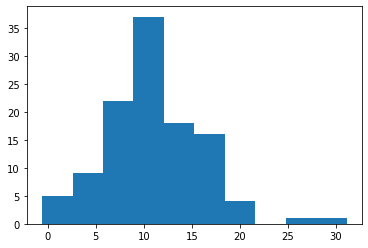

In [8]:
plt.hist(neighborhoodStats['mean_days_past_due'])